In [1]:
import pandas as pd
import pandas_gbq as gbq 
from datetime import datetime, timedelta
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
us_aid_df = pd.read_csv("us_foreign_aid_complete.csv")

/var/folders/0n/nzb139d17cdcpxbqm8n0fyp40000gn/T/ipykernel_45563/2621496949.py:1: DtypeWarning: Columns (6,7,12,48) have mixed types. Specify dtype option on import or set low_memory=False.
  us_aid_df = pd.read_csv("us_foreign_aid_complete.csv")


In [6]:
sql = """
    SELECT Actor1CountryCode, Actor2CountryCode, ActionGeo_FullName, EventCode, AvgTone, GoldsteinScale, NumArticles, SQLDATE
    FROM `gdelt-bq.full.events` 
    WHERE FractionDate >= 2014 AND FractionDate <= 2023
    AND (Actor1CountryCode = "UKR" OR Actor1CountryCode = "ISR" OR Actor1CountryCode = "MOZ" OR Actor1CountryCode = "IND" OR Actor1CountryCode = "ESP")
"""

news_df = gbq.read_gbq(sql, project_id='cs498css')

Downloading: 100%|██████████|


In [8]:
news_df

,Actor1CountryCode,Actor2CountryCode,ActionGeo_FullName,EventCode,AvgTone,GoldsteinScale,NumArticles,SQLDATE
0,ESP,None,"Santiago De Compostela, Galicia, Spain",0231,-1.596351,3.4,10,20220720
1,ISR,USA,"Jerusalem, Israel (general), Israel",0862,0.510856,9.0,1,20220720
2,ISR,None,Israel,163,-5.489260,-8.0,10,20200213
3,ISR,None,"Gesher, Ha?afon, Israel",022,1.498371,3.2,2,20200216
4,ISR,None,"Tel Aviv, Tel Aviv, Israel",1823,-4.304636,-10.0,10,20200213
...,...,...,...,...,...,...,...,...
15404798,ISR,PSE,"Nahr El Bared, Lebanon (general), Lebanon",0841,2.052786,7.0,2,20140220
15404799,ISR,ISR,United States,0841,-3.699674,7.0,2,20190729
15404800,IND,None,"Kerala, Kerala, India",0841,-7.765152,7.0,2,20211011
15404801,IND,None,"Vadodara, Gujarat, India",0841,-1.442308,7.0,4,20211016


In [10]:
news_df['Month'] = news_df['SQLDATE'].astype(str).str[4:6]

In [15]:
news_df['Year'] = news_df['SQLDATE'].astype(str).str[0:4]

In [25]:
news_df['WeightedTone'] = news_df['AvgTone'] * news_df['NumArticles']
news_df['WeightedGoldstein'] = news_df['GoldsteinScale'] * news_df['NumArticles']

In [26]:
news_df.head()

,Actor1CountryCode,Actor2CountryCode,ActionGeo_FullName,EventCode,AvgTone,GoldsteinScale,NumArticles,SQLDATE,Month,Year,WeightedTone,WeightedGoldstein
0,ESP,None,"Santiago De Compostela, Galicia, Spain",0231,-1.596351,3.4,10,20220720,07,2022,-15.963512,34.0
1,ISR,USA,"Jerusalem, Israel (general), Israel",0862,0.510856,9.0,1,20220720,07,2022,0.510856,9.0
2,ISR,None,Israel,163,-5.489260,-8.0,10,20200213,02,2020,-54.892601,-80.0
3,ISR,None,"Gesher, Ha?afon, Israel",022,1.498371,3.2,2,20200216,02,2020,2.996743,6.4
4,ISR,None,"Tel Aviv, Tel Aviv, Israel",1823,-4.304636,-10.0,10,20200213,02,2020,-43.046358,-100.0


In [12]:
aid_df = us_aid_df

In [13]:
aid_df.head()

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
0,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,2,Obligations,2006,01MAR2006,37760,52794,13,Technical Cooperation - Other,.,30831
1,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01MAR2006,983,1374,13,Technical Cooperation - Other,.,30831
2,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01MAY2006,3392,4742,13,Technical Cooperation - Other,.,30831
3,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01JUL2006,5001,6992,13,Technical Cooperation - Other,.,30831
4,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01AUG2006,4257,5952,13,Technical Cooperation - Other,.,30831


In [14]:
aid_df.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym',
       'Managing Agency Name', 'Managing Sub-agency or Bureau ID',
       'Managing Sub-agency or Bureau Acronym',
       'Managing Sub-agency or Bureau Name',
       'Implementing Partner Category ID',
       'Implementing Partner Category Name',
       'Implementing Partner Sub-category ID',
       'Implementing Partner Sub-category Name', 'Implementing Partner ID',
       'Implementing Partner Name', 'International Category ID',
       'International Category Name', 'International Sector Code',
       'International Sector Name', 'International Purpose Code',
       'International Purpose Name', 'US Category ID', 'US Category Name',
       'US Sector ID', 'US Sector Name', 'Funding Account ID',
       'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name',
       'Fu

In [27]:
yearly_news_df = news_df.drop(columns=['Actor2CountryCode', 'ActionGeo_FullName', 'EventCode', 'SQLDATE', 'Month']).groupby(['Actor1CountryCode', 'Year']).agg({'AvgTone': 'mean', 'WeightedTone': 'sum', 'GoldsteinScale': 'mean', 'WeightedGoldstein': 'sum', 'NumArticles': 'sum'})

In [29]:
yearly_news_df

AvgTone     WeightedTone  GoldsteinScale  \
Actor1CountryCode Year                                              
ESP               2014  2.532226   2764956.512018        0.833274   
                  2015 -1.021340   -4692497.55464        0.709989   
                  2016 -1.360722   -5460656.08635        0.632827   
                  2017 -2.081976 -12721690.827569        0.258987   
                  2018 -1.715469  -6374405.042097        0.776110   
                  2019 -1.514565  -5000990.950957        0.857517   
                  2020 -1.824745  -4132870.463049        1.023518   
                  2021 -1.422386  -2952934.412804        0.857094   
                  2022 -1.082500  -1470668.639837        1.016610   
IND               2014  2.341826   7283015.338568        0.096196   
                  2015 -1.687693   -10839120.9304        0.154907   
                  2016 -2.395561  -15678851.21583       -0.023730   
                  2017 -2.377461 -12667268.330432       -0.071826   
                  2018 -2.405109 -12460338.899203       -0.112022   
                  2019 -2.445700 -12391754.189323       -0.144872   
                  2020 -2.685064  -9961458.672367        0.030011   
                  2021 -2.252758  -6178149.939663        0.047694   
                  2022 -2.096174  -4999422.046531        0.015461   
ISR               2014  2.171715  13574802.693802       -0.919548   
                  2015 -2.923489 -34318268.426544       -0.724135   
                  2016 -3.253223 -42364613.865971       -0.632287   
                  2017 -2.715353 -40141282.814908       -0.142115   
                  2018 -3.219586 -56398805.944357       -0.639556   
                  2019 -2.879806  -33936533.41616       -0.440151   
                  2020 -2.307200 -15366660.620841        0.345865   
                  2021 -2.966806 -22532931.509435       -0.473064   
                  2022 -2.903556 -14205175.680191       -0.370905   
MOZ               2014  2.637513    296419.483804        1.040283   
                  2015 -1.410667   -464466.020118        0.753741   
                  2016 -1.708490   -553061.253959        0.784484   
                  2017 -1.512838   -239569.460827        1.290889   
                  2018 -1.542661   -290357.831962        1.261988   
                  2019 -2.494891   -876119.542641        1.226627   
                  2020 -3.453088   -367823.212337        0.270358   
                  2021 -3.562016   -528561.232485        0.393434   
                  2022 -1.986851   -102124.656879        0.996783   
UKR               2014  1.984675  13936012.918384       -0.173218   
                  2015 -2.171088  -8203666.054053        0.185323   
                  2016 -2.941409   -5910837.69946        0.041781   
                  2017 -2.859516  -5828439.398914        0.045124   
                  2018 -2.990174  -6468122.482325        0.034469   
                  2019 -2.691462 -11471338.743408        0.725254   
                  2020 -2.960946  -5113919.753554        0.449556   
                  2021 -2.600824  -3289066.437446        0.558445   
                  2022 -3.241338 -56989353.063276        0.011566   

                        WeightedGoldstein  NumArticles  
Actor1CountryCode Year                                  
ESP               2014           865122.7      1176891  
                  2015     1385584.099998      2418348  
                  2016      347153.000067      2580090  
                  2017         -1827442.8      3605615  
                  2018          1057117.1      2257524  
                  2019           754599.4      1924728  
                  2020          1709988.4      1691422  
                  2021           752118.0      1304619  
                  2022           887755.4       995569  
IND               2014           602286.0      3074777  
                  2015     1202974.800005      5897870  
                  2016      818588.20001

In [123]:
selected_aid_df = us_aid_df[((us_aid_df['Country Code'] == 'UKR') | (us_aid_df['Country Code'] == 'ISR') | (us_aid_df['Country Code'] == 'MOZ') | (us_aid_df['Country Code'] == 'IND') | (us_aid_df['Country Code'] == 'ESP'))]

In [110]:
selected_aid_df.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym',
       'Managing Agency Name', 'Managing Sub-agency or Bureau ID',
       'Managing Sub-agency or Bureau Acronym',
       'Managing Sub-agency or Bureau Name',
       'Implementing Partner Category ID',
       'Implementing Partner Category Name',
       'Implementing Partner Sub-category ID',
       'Implementing Partner Sub-category Name', 'Implementing Partner ID',
       'Implementing Partner Name', 'International Category ID',
       'International Category Name', 'International Sector Code',
       'International Sector Name', 'International Purpose Code',
       'International Purpose Name', 'US Category ID', 'US Category Name',
       'US Sector ID', 'US Sector Name', 'Funding Account ID',
       'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name',
       'Fu

In [152]:
selected_aid_df = selected_aid_df[['Year', 'Country Code', 'Constant Dollar Amount']].groupby(['Country Code', 'Year']).agg('sum')

#.drop(columns=['Actor2CountryCode', 'ActionGeo_FullName', 'EventCode', 'SQLDATE', 'Month']).groupby(['Actor1CountryCode', 'Year']).agg({'AvgTone': 'mean', 'WeightedTone': 'sum', 'GoldsteinScale': 'mean', 'WeightedGoldstein': 'sum', 'NumArticles': 'sum'})

In [153]:
selected_aid_df = selected_aid_df.reset_index()
selected_aid_df

,Country Code,Year,Constant Dollar Amount
0,ESP,2014,6342498
1,ESP,2015,456490
2,ESP,2016,232616
3,ESP,2017,275090
4,ESP,2018,753941
5,ESP,2019,-43215
6,ESP,2020,72445
7,ESP,2021,972764
8,ESP,2022,3838399
9,IND,2014,318258929


In [ ]:
selected_aid_df['Country Code'].unique()

array(['ESP', 'IND', 'ISR', 'MOZ', 'UKR'], dtype=object)

In [126]:
selected_aid_df[selected_aid_df['Country Code'] == 'UKR']

,Country Code,Fiscal Year,Constant Dollar Amount
319,UKR,1990,258379
320,UKR,1991,594417
321,UKR,1992,960367
322,UKR,1993,251918236
323,UKR,1994,679794328
324,UKR,1995,457198215
325,UKR,1996,297049522
326,UKR,1997,177039009
327,UKR,1998,463980198
328,UKR,1999,474647164


In [47]:
yearly_news_df = yearly_news_df.reset_index()
yearly_news_df

,index,Actor1CountryCode,Year,AvgTone,WeightedTone,GoldsteinScale,WeightedGoldstein,NumArticles
0,0,ESP,2014,2.532226,2764956.512018,0.833274,865122.7,1176891
1,1,ESP,2015,-1.021340,-4692497.55464,0.709989,1385584.099998,2418348
2,2,ESP,2016,-1.360722,-5460656.08635,0.632827,347153.000067,2580090
3,3,ESP,2017,-2.081976,-12721690.827569,0.258987,-1827442.8,3605615
4,4,ESP,2018,-1.715469,-6374405.042097,0.776110,1057117.1,2257524
5,5,ESP,2019,-1.514565,-5000990.950957,0.857517,754599.4,1924728
6,6,ESP,2020,-1.824745,-4132870.463049,1.023518,1709988.4,1691422
7,7,ESP,2021,-1.422386,-2952934.412804,0.857094,752118.0,1304619
8,8,ESP,2022,-1.082500,-1470668.639837,1.016610,887755.4,995569
9,9,IND,2014,2.341826,7283015.338568,0.096196,602286.0,3074777


In [128]:
selected_aid_df['Fiscal Year'] = selected_aid_df['Fiscal Year'].astype(str)


In [131]:
selected_aid_df['Fiscal Year'] = selected_aid_df['Fiscal Year'].str[0:4]

In [133]:
selected_aid_df['Fiscal Year'] = selected_aid_df['Fiscal Year'].astype(int)

In [134]:
selected_aid_df['Country Code'].unique()

array(['ESP', 'IND', 'ISR', 'MOZ', 'UKR'], dtype=object)

In [135]:
selected_aid_df[selected_aid_df['Country Code'] == 'UKR']

,Country Code,Fiscal Year,Constant Dollar Amount
319,UKR,1990,258379
320,UKR,1991,594417
321,UKR,1992,960367
322,UKR,1993,251918236
323,UKR,1994,679794328
324,UKR,1995,457198215
325,UKR,1996,297049522
326,UKR,1997,177039009
327,UKR,1998,463980198
328,UKR,1999,474647164


In [136]:
selected_aid_df = selected_aid_df[(selected_aid_df['Fiscal Year'] >= 2014) & (selected_aid_df['Fiscal Year'] <= 2022)]
selected_aid_df['Country Code'].unique()

array(['ESP', 'IND', 'ISR', 'MOZ', 'UKR'], dtype=object)

In [137]:
selected_aid_df['Country Code'].unique()

array(['ESP', 'IND', 'ISR', 'MOZ', 'UKR'], dtype=object)

In [76]:
sub_df = pd.DataFrame(columns = yearly_news_df.columns)
sub_df.columns

Index(['index', 'Actor1CountryCode', 'Year', 'AvgTone', 'WeightedTone',
       'GoldsteinScale', 'WeightedGoldstein', 'NumArticles'],
      dtype='object')

In [77]:
yearly_news_df.columns

Index(['index', 'Actor1CountryCode', 'Year', 'AvgTone', 'WeightedTone',
       'GoldsteinScale', 'WeightedGoldstein', 'NumArticles'],
      dtype='object')

In [140]:
selected_aid_df['Year'] = selected_aid_df['Fiscal Year']
selected_aid_df = selected_aid_df.drop(columns = ['Fiscal Year'])

/var/folders/0n/nzb139d17cdcpxbqm8n0fyp40000gn/T/ipykernel_45563/3860046683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_aid_df['Year'] = selected_aid_df['Fiscal Year']


In [150]:
selected_aid_df.to_csv("selectedaid.csv")

In [159]:
yearly_news_df['Country Code'] = yearly_news_df['Actor1CountryCode']

In [161]:
yearly_news_df = yearly_news_df.drop(columns='Actor1CountryCode')

In [85]:
len(selected_aid_df)

36

In [164]:
selected_aid_df['Year'].dtype

dtype('int64')

In [166]:
yearly_news_df['Year'] = yearly_news_df['Year'].astype(int)

In [167]:
yearly_news_df['Year'].dtype

dtype('int64')

In [170]:
sub_df = pd.merge(yearly_news_df, selected_aid_df, on=['Country Code', 'Year'])

In [208]:

sub_df['WeightedTone'] = sub_df['WeightedTone'].astype(int)
sub_df

,index,Year,AvgTone,WeightedTone,GoldsteinScale,WeightedGoldstein,NumArticles,DollarAmount,Country
0,0,2014,2.532226,2764956,0.833274,865122,1176891,6342498,ESP
1,1,2015,-1.021340,-4692497,0.709989,1385584,2418348,456490,ESP
2,2,2016,-1.360722,-5460656,0.632827,347153,2580090,232616,ESP
3,3,2017,-2.081976,-12721690,0.258987,-1827442,3605615,275090,ESP
4,4,2018,-1.715469,-6374405,0.776110,1057117,2257524,753941,ESP
5,5,2019,-1.514565,-5000990,0.857517,754599,1924728,-43215,ESP
6,6,2020,-1.824745,-4132870,1.023518,1709988,1691422,72445,ESP
7,7,2021,-1.422386,-2952934,0.857094,752118,1304619,972764,ESP
8,8,2022,-1.082500,-1470668,1.016610,887755,995569,3838399,ESP
9,9,2014,2.341826,7283015,0.096196,602285,3074777,318258929,IND


In [267]:
country = smf.ols(formula='DollarAmount ~  WeightedTone * NumArticles + WeightedGoldstein * NumArticles + Country',data=sub_df)

In [252]:
no_country = smf.ols(formula='DollarAmount ~  WeightedTone * NumArticles + WeightedGoldstein * NumArticles',data=sub_df)

In [286]:
articles = smf.ols("DollarAmount ~ I(NumArticles**2)", data=sub_df)

In [268]:
country_res = country.fit()

In [254]:
no_country_res = no_country.fit()

In [287]:
articles_res = articles.fit()

In [269]:
country_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DollarAmount   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     110.3
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           6.31e-22
Time:                        16:17:03   Log-Likelihood:                -999.73
No. Observations:                  45   AIC:                             2011.
Df Residuals:                      39   BIC:                             2022.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      7.468e+08   2.14e+08      3.493      0.001    3.14e+08    1.18e+09
Country[T.IND]                -2.053e+09   5.32e+08     -3.862      0.000   -3.13e+09   -9.78e+08
Country[T.ISR]                 6.312e+08   2.23e+08      2.836      0.007    1.81e+08    1.08e+09
Country[T.MOZ]                 6.827e+08   2.06e+08      3.321      0.002    2.67e+08     1.1e+09
Country[T.UKR]                 1.268e+08    4.4e+08      0.288      0.775   -7.64e+08    1.02e+09
WeightedTone                    171.1335     35.120      4.873      0.000     100.096     242.171
NumArticles                     377.2780    113.197      3.333      0.002     148.315     606.241
WeightedTone:NumArticles      -3.278e-05   3.42e-06     -9.595      0.000   -3.97e-05   -2.59e-05
WeightedGoldstein             -1142.9537    172.725     -6.617      0.000   -1492.323    -793.584
WeightedGoldstein:NumArticles     0.0001    1.6e-05      8.526      0.000       0.000       0.000
==============================================================================
Omnibus:                        6.449   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.499
Skew:                           0.487   Prob(JB):                       0.0388
Kurtosis:                       4.587   Cond. No.                     1.56e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [256]:
no_country_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DollarAmount   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     78.64
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.65e-19
Time:                        16:09:36   Log-Likelihood:                -1006.7
No. Observations:                  45   AIC:                             2025.
Df Residuals:                      39   BIC:                             2036.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       1.54e+09   3.84e+08      4.007      0.000    7.62e+08    2.32e+09
WeightedTone                    231.3379     42.141      5.490      0.000     146.100     316.576
NumArticles                      36.6091    117.292      0.312      0.757    -200.636     273.855
WeightedTone:NumArticles       -4.17e-05   4.06e-06    -10.279      0.000   -4.99e-05   -3.35e-05
WeightedGoldstein             -1517.5708    171.510     -8.848      0.000   -1864.483   -1170.659
WeightedGoldstein:NumArticles     0.0002   1.79e-05      9.057      0.000       0.000       0.000
==============================================================================
Omnibus:                       23.825   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.684
Skew:                           1.519   Prob(JB):                     5.38e-10
Kurtosis:                       6.680   Cond. No.                     3.99e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='NumArticles', ylabel='DollarAmount'>

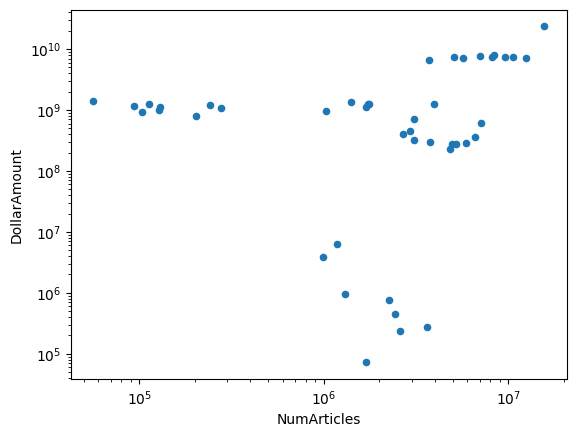

In [280]:
sub_df.plot(x="NumArticles", y="DollarAmount", loglog = True, kind = 'scatter')

In [288]:
articles_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DollarAmount   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     129.8
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.43e-14
Time:                        16:24:20   Log-Likelihood:                -1029.6
No. Observations:                  45   AIC:                             2063.
Df Residuals:                      43   BIC:                             2067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.015e+08   3.67e+08      1.095      0.280   -3.38e+08    1.14e+09
I(NumArticles ** 2)   7.85e-05   6.89e-06     11.392      0.000    6.46e-05    9.24e-05
==============================================================================
Omnibus:                        2.996   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                1.994
Skew:                           0.299   Prob(JB):                        0.369
Kurtosis:                       3.840   Cond. No.                     6.12e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['logx']
  warnings.warn(msg, ValueWarning)


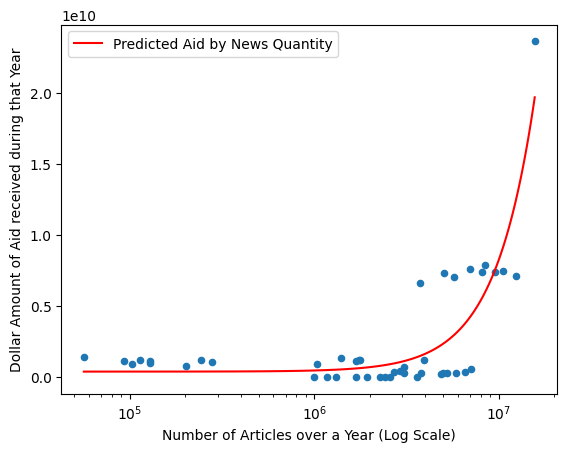

In [301]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
sub_df.plot(x="NumArticles", y="DollarAmount", logx = True, kind='scatter')

# Fit an OLS model
model = smf.ols("DollarAmount ~ I(NumArticles**2)", logx = True, data=sub_df)
result = model.fit()

# Generate predictions
num_articles = np.linspace(sub_df["NumArticles"].min(), sub_df["NumArticles"].max(), 100)
predicted = result.predict({"NumArticles": num_articles})

# Plot the regression line
plt.plot(num_articles, predicted, color='red', label='Predicted Aid by News Quantity')
plt.legend()
plt.xlabel("Number of Articles over a Year (Log Scale)")
plt.ylabel("Dollar Amount of Aid received during that Year")
plt.show()
